In [1]:
import tensorflow as tf
tf.keras.utils.get_file('cats_and_dogs_filtered.zip',"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")

'/home/aarav/.keras/datasets/cats_and_dogs_filtered.zip'

In [2]:
import os
import zipfile #to handle zip file

local_zip = '/home/aarav/.keras/datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
!ls

10_activation_functions.ipynb	   2_GD_using_Autograd.ipynb
11_MNIST.ipynb			   3_linear_regression.ipynb
12_CNN-ADAM.ipynb		   4_logistic.ipynb
12_CNN.ipynb			   5_datasets_dataloader.ipynb
13_activation_functions.ipynb	   6_DataTransformer.ipynb
14_mar_cifar.ipynb		   7_classes.ipynb
15_transfer_leaer_ants_bees.ipynb  8_softmax_crossentropy.ipynb
16_furits_resnet18.ipynb	   9_Neural_net_with_softmax.ipynb
16_tensorboard.ipynb		   cats_and_dogs_filtered
17_idea_model.ipynb		   cifar_net.pth
18_transfer_horse_human.ipynb	   data
19_transfer_horse_human.ipynb	   resnet.pt
1_tensor_basics.ipynb		   runs
20_cat_dog.ipynb		   wine.csv
21_trans_cat_dog.ipynb


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [5]:
std_normalize = transforms.Normalize(mean=[0, 0, 0],std=[1, 1, 1])

In [6]:
trans_train = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])
trans_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    std_normalize
])

In [7]:
train_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/train',transform=trans_train)

In [8]:
train_dataset.classes

['cats', 'dogs']

In [9]:
test_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/validation',transform=trans_test)

In [10]:
batch_size = 8

In [11]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0, 0, 0], std=[1, 1, 1])
           )

In [12]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: cats_and_dogs_filtered/validation
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0, 0, 0], std=[1, 1, 1])
           )

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [14]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [15]:
examples = iter(train_loader)
samples ,labels = examples.next()
print(samples.shape)
labels

torch.Size([8, 3, 224, 224])


tensor([0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [17]:
sample_plot = samples[0:16]
label_plot = labels[0:16]

In [18]:
out = torchvision.utils.make_grid(sample_plot)

In [19]:
class_name = train_dataset.classes

In [20]:
class_name

['cats', 'dogs']

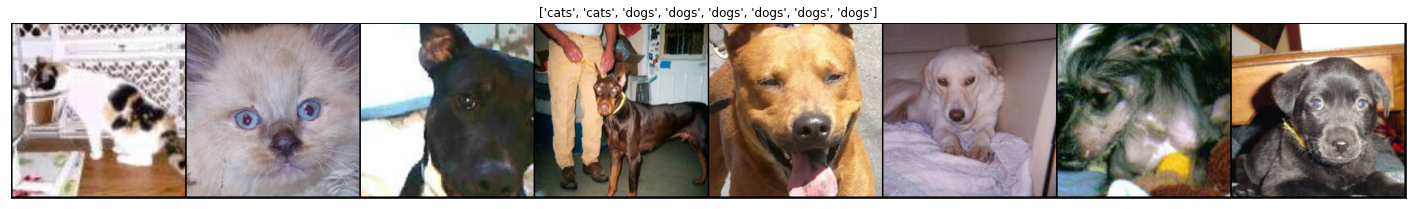

In [21]:
imshow(out,title=[class_name[x] for x in label_plot])

In [22]:
model = nn.Sequential(
nn.Conv2d(3,32,5,padding=1),#222
nn.ReLU(),
nn.MaxPool2d(2,2),#111
#nn.Dropout(0.2),
nn.Conv2d(32,64,5,padding=1),#109
nn.ReLU(),
nn.MaxPool2d(2,2),#54
#nn.Dropout(0.2),
nn.Conv2d(64,128,5,padding=1),#52
nn.ReLU(),
nn.MaxPool2d(2,2),#26
#nn.Dropout(0.2),
nn.Flatten(),
nn.Linear(26*26*128,512),
nn.ReLU(),    
#nn.Dropout(0.2),
nn.Linear(512,1),
nn.Sigmoid())

In [23]:
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=86528, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=1, bias=True)
  (13): Sigmoid()
)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
model = model.to(device)

In [26]:
from torch.nn.modules.loss import BCEWithLogitsLoss
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
#model.to(device)

In [27]:
#Train the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

/home/aarav/anaconda3/envs/pract/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch:1,loss=0.6928380727767944
epoch:1,loss=0.6559445858001709
epoch:1,loss=4.452794551849365
epoch:1,loss=1.0512138605117798
epoch:1,loss=0.8469476103782654
epoch:1,loss=0.6394528150558472
epoch:1,loss=0.7290353775024414
epoch:1,loss=0.6755714416503906
epoch:1,loss=0.7151665687561035
epoch:1,loss=0.6869332194328308
epoch:1,loss=0.7040838003158569
epoch:1,loss=0.7022281885147095
epoch:1,loss=0.6929842233657837
epoch:1,loss=0.6577616930007935
epoch:1,loss=0.7064357995986938
epoch:1,loss=0.7130242586135864
epoch:1,loss=0.5525348782539368
epoch:1,loss=0.5153824687004089
epoch:1,loss=0.7715420722961426
epoch:1,loss=0.8274939060211182
epoch:1,loss=0.5852874517440796
epoch:1,loss=0.7467546463012695
epoch:1,loss=0.9004389047622681
epoch:1,loss=0.5928325653076172
epoch:1,loss=0.7317743301391602
epoch:1,loss=0.732480525970459
epoch:1,loss=0.7175949811935425
epoch:1,loss=0.6928238868713379
epoch:1,loss=0.6954599618911743
epoch:1,loss=0.692564845085144
epoch:1,loss=0.6968804001808167
epoch:1,los

epoch:2,loss=0.6857076287269592
epoch:2,loss=0.7030721306800842
epoch:2,loss=0.7316412329673767
epoch:2,loss=0.6887679100036621
epoch:2,loss=0.6829386949539185
epoch:2,loss=0.7336903810501099
epoch:2,loss=0.6991700530052185
epoch:2,loss=0.6946908235549927
epoch:2,loss=0.6933298110961914
epoch:2,loss=0.6611726880073547
epoch:2,loss=0.6168373227119446
epoch:2,loss=0.6342719197273254
epoch:2,loss=0.6927437782287598
epoch:2,loss=0.6869933605194092
epoch:2,loss=0.6971258521080017
epoch:2,loss=0.7921181917190552
epoch:2,loss=0.6884223222732544
epoch:2,loss=0.6905002593994141
epoch:2,loss=0.6928592324256897
epoch:2,loss=0.6916327476501465
epoch:2,loss=0.6927008032798767
epoch:2,loss=0.6933346390724182
epoch:2,loss=0.6894447207450867
epoch:2,loss=0.6650565266609192
epoch:2,loss=0.6977790594100952
epoch:2,loss=0.7310410737991333
epoch:2,loss=0.7655719518661499
epoch:2,loss=0.6735445261001587
epoch:2,loss=0.6633872389793396
epoch:2,loss=0.7088168859481812
epoch:2,loss=0.6660163998603821
epoch:2,

epoch:3,loss=0.7025331258773804
epoch:3,loss=0.6947665214538574
epoch:3,loss=0.6943608522415161
epoch:3,loss=0.6914343237876892
epoch:3,loss=0.696610689163208
epoch:3,loss=0.6933940052986145
epoch:3,loss=0.6960858702659607
epoch:3,loss=0.6849061250686646
epoch:3,loss=0.6707836985588074
epoch:3,loss=0.8607811331748962
epoch:3,loss=0.6777800917625427
epoch:3,loss=0.6708248853683472
epoch:3,loss=0.6933836936950684
epoch:3,loss=0.6922063827514648
epoch:3,loss=0.6891148686408997
epoch:3,loss=0.6932602524757385
epoch:3,loss=0.6903672218322754
epoch:3,loss=0.6992843151092529
epoch:3,loss=0.690384566783905
epoch:3,loss=0.7016280889511108
epoch:3,loss=0.6905064582824707
epoch:3,loss=0.6985220909118652
epoch:3,loss=0.6931989192962646
epoch:3,loss=0.6932023763656616
epoch:3,loss=0.6931866407394409
epoch:3,loss=0.6986734867095947
epoch:3,loss=0.6908441781997681
epoch:3,loss=0.6978238224983215
epoch:3,loss=0.6931816339492798
epoch:3,loss=0.695358395576477
epoch:3,loss=0.6910877227783203
epoch:3,los

epoch:4,loss=0.693138599395752
epoch:4,loss=0.6929681301116943
epoch:4,loss=0.6930040717124939
epoch:4,loss=0.6931477785110474
epoch:4,loss=0.6928281784057617
epoch:4,loss=0.6931453943252563
epoch:4,loss=0.6931483745574951
epoch:4,loss=0.6936827301979065
epoch:4,loss=0.692570149898529
epoch:4,loss=0.6944233775138855
epoch:4,loss=0.6931579113006592
epoch:4,loss=0.6931527853012085
epoch:4,loss=0.6931471824645996
epoch:4,loss=0.6945921182632446
epoch:4,loss=0.6931525468826294
epoch:4,loss=0.6931649446487427
epoch:4,loss=0.6938437819480896
epoch:4,loss=0.6911171674728394
epoch:4,loss=0.692452609539032
epoch:4,loss=0.6938734650611877
epoch:4,loss=0.6938930749893188
epoch:4,loss=0.6924159526824951
epoch:4,loss=0.6916265487670898
epoch:4,loss=0.693941593170166
epoch:4,loss=0.6931513547897339
epoch:4,loss=0.692317545413971
epoch:4,loss=0.6931530833244324
epoch:4,loss=0.694037675857544
epoch:4,loss=0.6940481662750244
epoch:4,loss=0.6958253979682922
epoch:4,loss=0.6897596716880798
epoch:4,loss=0

epoch:5,loss=0.6942795515060425
epoch:5,loss=0.693156898021698
epoch:5,loss=0.6897500157356262
epoch:5,loss=0.6908221244812012
epoch:5,loss=0.6943858861923218
epoch:5,loss=0.6918970942497253
epoch:5,loss=0.6905306577682495
epoch:5,loss=0.6918123960494995
epoch:5,loss=0.6888164281845093
epoch:5,loss=0.6947163343429565
epoch:5,loss=0.6947948932647705
epoch:5,loss=0.694853663444519
epoch:5,loss=0.6948909759521484
epoch:5,loss=0.6931716203689575
epoch:5,loss=0.6914148330688477
epoch:5,loss=0.6967427730560303
epoch:5,loss=0.6896048784255981
epoch:5,loss=0.6913653612136841
epoch:5,loss=0.6913301944732666
epoch:5,loss=0.6931757926940918
epoch:5,loss=0.6951055526733398
epoch:5,loss=0.6931761503219604
epoch:5,loss=0.6971211433410645
epoch:5,loss=0.6912168264389038
epoch:5,loss=0.697108268737793
epoch:5,loss=0.6931771039962769
epoch:5,loss=0.6950955986976624
epoch:5,loss=0.6931755542755127
epoch:5,loss=0.6894646883010864
epoch:5,loss=0.6950280070304871
epoch:5,loss=0.6913357377052307
epoch:5,los

tensor([[0.5006],
        [0.5006],
        [0.5006],
        [0.5006],
        [0.5006],
        [0.5006],
        [0.5006],
        [0.5006]], device='cuda:0', grad_fn=<SigmoidBackward>)
1
1
1
1
1
1
1
1


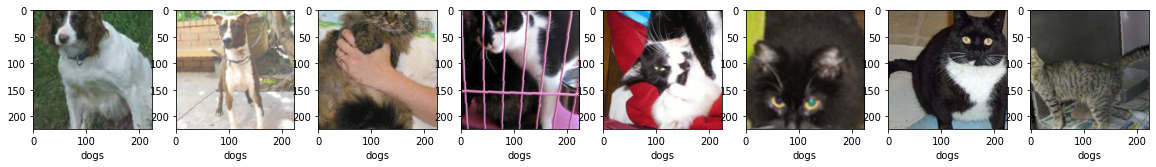

In [28]:
import numpy as np
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                         batch_size=batch_size, 
                         shuffle=True)

for features, targets in test_loader:
    break
    

predictions = model(features[:8].to(device))
#print(predictions)
#predictions = int(predictions)
d = test_dataset.classes
#print(d)
print(predictions)
fig, ax = plt.subplots(1, 8, figsize=(20, 10))
for i in range(8):
    img = features[i]
    ax[i].imshow(np.transpose(img, (1, 2, 0)))
    ax[i].set_xlabel(d[int(np.array(predictions[i].item()).round())])
    print(int(np.array(predictions[i].item()).round()))

plt.show()

In [29]:
test = samples[4].view(1,3,224,224)
test = test.to(device)
out = model(test)

In [30]:
out.item()

0.5006007552146912